1. Read the dataset from the below link
https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/US_Baby_
Names/US_Baby_Names_right.csv

Questions:
1. Delete unnamed columns
2. Show the distribution of male and female
3. Show the top 5 most preferred names
4. What is the median name occurence in the dataset
5. Distribution of male and female born count by states

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv('C:\\Users\\sapni\\Downloads\\iNeuron\\Assignments\\NationalNames.csv')
df.head()

,Id,Name,Year,Gender,Count
0,1,Mary,1880,F,7065
1,2,Anna,1880,F,2604
2,3,Emma,1880,F,2003
3,4,Elizabeth,1880,F,1939
4,5,Minnie,1880,F,1746


In [3]:
df.drop(df.columns[df.columns.str.contains('Unnamed','case=False')],axis = 1,inplace = True)
df.head()

,Id,Name,Year,Gender,Count
0,1,Mary,1880,F,7065
1,2,Anna,1880,F,2604
2,3,Emma,1880,F,2003
3,4,Elizabeth,1880,F,1939
4,5,Minnie,1880,F,1746


In [4]:
np.round((df['Gender'].value_counts())/len(df)*100,2)

F    59.26
M    40.74
Name: Gender, dtype: float64

In [5]:
df.groupby('Name')['Count'].sum().sort_values(ascending=False).head()

Name
James      5129096
John       5106590
Robert     4816785
Michael    4330805
Mary       4130441
Name: Count, dtype: int64

In [6]:
df.median()['Id']

912717.0

In [12]:
df.groupby(['Gender'])['Count'].sum()

Gender
F    167070477
M    170064949
Name: Count, dtype: int64

2. We have the min and max temperatures in a city In India for each months of the year. We
would like to find a function to describe this and show it graphically, the dataset given below.
Task:
    1. fitting it to the periodic function
    2. plot the fit
Data
Max = 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25
Min = 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18

Text(0, 0.5, 'Min and max temperature')

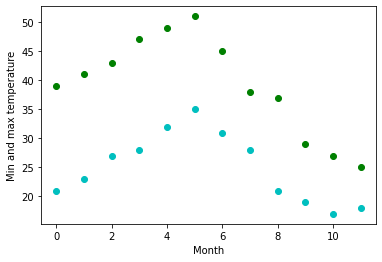

In [16]:
import numpy as np

temp_max = np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
temp_min = np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])

import matplotlib.pyplot as plt
months = np.arange(12)
plt.plot(months, temp_max, 'go')
plt.plot(months, temp_min, 'co')
plt.xlabel('Month')
plt.ylabel('Min and max temperature')

In [17]:
from scipy import optimize
def yearly_temps(times, avg, ampl, time_offset):
    return (avg
            + ampl * np.cos((times + time_offset) * 1.8 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(yearly_temps, months,
                                      temp_max, [40, 20, 0])
res_min, cov_min = optimize.curve_fit(yearly_temps, months,
                                      temp_min, [-40, 20, 0])

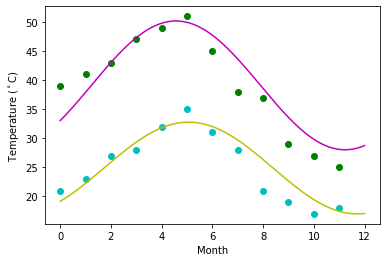

In [18]:
days = np.linspace(0, 12, num=365)

plt.figure()
plt.plot(months, temp_max, 'go')
plt.plot(days, yearly_temps(days, *res_max), 'm-')
plt.plot(months, temp_min, 'co')
plt.plot(days, yearly_temps(days, *res_min), 'y-')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')

plt.show()